# Creating features

you will work with a dataset called `sales_df`, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:
```
     tv        radio      social_media    sales
1    13000.0   9237.76    2409.57         46677.90
2    41000.0   15886.45   2913.41         150177.83
```
You will use the advertising expenditure as features to predict sales values, initially working with the "`radio`" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

In [2]:
import pandas as pd
import numpy as np

sales_df = pd.read_csv("dataset/advertising_and_sales_clean.csv")
# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


# Building a linear regression model

Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

In [3]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression 

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


# Visualizing a linear regression model

Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between `radio` advertising expenditure and `sales` values

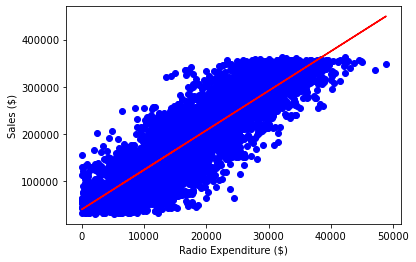

In [4]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

# Fit and predict for regression

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the `sales_df` dataset, which has been preloaded for you.

In [7]:
from sklearn.model_selection import train_test_split
# Create X and y arrays
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


# Regression performance

Now you have fit a model, `reg`, using all features from `sales_df`, and made predictions of sales values, you can evaluate performance using some common regression metrics.
Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

In [8]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001015


# Cross-validation for R-squared

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

In [9]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


# Analyzing cross-validation metrics

Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for `cv_results`, which has been preloaded for you from the previous exercise.

In [11]:
cv_results = cv_scores
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


# Regularized regression: Ridge

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their r-squared
 scores. 

In [12]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


# Lasso regression for feature importance

 you saw how lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the `sales_df` data and plot the model's coefficients.

[ 3.56256962 -0.00397035  0.00496385]


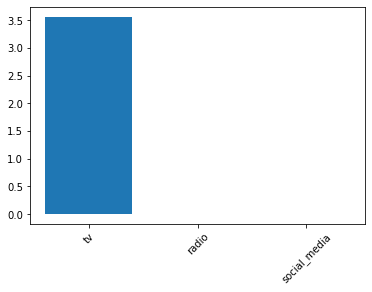

In [15]:
# Import Lasso
from sklearn.linear_model import Lasso
sales_columns = sales_df.drop(["sales","influencer"], axis=1).columns
# Instantiate a lasso regression model
lasso = Lasso(alpha = 0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()